# 타이타닉!!

##1. Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


##2. Loading dataset

In [5]:
df = pd.read_csv('./train.csv')

## 3. 데이터 확인(Inspecting data)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## data dictionary

 0   PassengerId  승객식별번호  
 1   Survived     생존여부(1: 생존, 2:사망)

 2   Pclass       티켓 등급 (1: 1등급, 2: 2등급, 3: 3등급)

 3   Name         승객명 

 4   Sex          성별 (mail: 남, female: 여)

 5   Age          연령 

 6   SibSp        동승객 숫

 7   Parch        부모/자녀 동승 수 

 8   Ticket       티켓번호
 
 9   Fare         티켓비용

 10  Cabin        선실정보

 11  Embarked     탑승부두명 (C: cherbourg, Q: Queenstown, S: Southampthon)

In [11]:
df.info()

# 이름(714개), cabin(204개), Embarked(889개)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
print('shaep : ', df.shape)
print('isnull sum : \n', df.isnull().sum())

shaep :  (891, 12)
isnull sum : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 4.불필요한 컬럼 삭제

#### 0 PassengerId 승객식별번호 무의미 - 삭제

In [18]:
df["Cabin"].value_counts()

# cabin 최대 4열은 같은 선실을 쓰기 때문에 큰 도움이 되지 않을것으로 생각되어 drop

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
E12            1
E31            1
A24            1
C47            1
C99            1
Name: Cabin, Length: 147, dtype: int64

In [19]:
df["Fare"].value_counts()

# Fare(표값)은 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [20]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

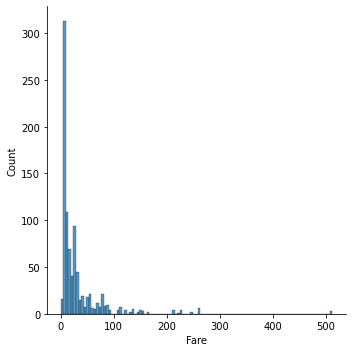

In [21]:
sns.displot(df["Fare"])

# 많이 편향되어 있는것을 확인, 의미있는 데이터로 유지

In [22]:
df["Ticket"].value_counts()
# Ticket은 cabin과 같이 무의미/삭제

347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
21440              1
PC 17603           1
C.A. 29566         1
SOTON/OQ 392089    1
229236             1
Name: Ticket, Length: 681, dtype: int64

In [23]:
df["Name"].duplicated().sum()
# 중복된 이름 여부 확인하고 중복된게 있으면 삭제
# 중복된 이름 없음

0

In [24]:
df["Title"] = df["Name"].apply(lambda p : p.split()[1])
# 이름을 잘라서 Title 컬럼생성

In [25]:
df["Title"].value_counts()

# 40개 미만의 관측치는 모형에 큰 도움이 되지 않음.
# Title에 대해 핫 인코딩을 한 번만 수행

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Impe,             3
Planke,           3
Mlle.             2
Col.              2
Gordon,           2
Major.            2
Ms.               1
Cruyssen,         1
Mulder,           1
Steen,            1
der               1
the               1
Capt.             1
Messemaeker,      1
Velde,            1
Walle,            1
Don.              1
Melkebeke,        1
Carlo,            1
Billiard,         1
Shawah,           1
Pelsmaeker,       1
Jonkheer.         1
Mme.              1
Name: Title, dtype: int64

In [26]:
# 우선 [Mr., Miss., Mrs., Master.] 이외의 것들을 Paㅣ로 변경

accetable_titles = ["Mr.", "Miss.", "Mrs.", "Master."]
def change_title(tit):
    if tit in accetable_titles:
        return tit
    else:
        return "Pal."

In [27]:
# 함수 실행
df ["Title"] = df["Title"].apply(lambda p : change_title(p))

In [28]:
# 변경확인
df["Title"].value_counts()

Mr.        502
Miss.      179
Mrs.       121
Pal.        49
Master.     40
Name: Title, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [30]:
# 불필요한 데이터 컬럼삭제
df.drop(["Cabin","Ticket","PassengerId","Name"],axis = 1, inplace=True)

In [32]:
# 삭제확인
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
5,0,3,male,NaN,0,0,8.4583,Q,Mr.
6,0,1,male,54.0,0,0,51.8625,S,Mr.
7,0,3,male,2.0,3,1,21.0750,S,Master.
8,1,3,female,27.0,0,2,11.1333,S,Mrs.
9,1,2,female,14.0,1,0,30.0708,C,Mrs.


# 5. 결측 데이터 확인

In [33]:
# 결측 데이터 확률로 표시
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent   

In [34]:
missing_percent(df)

# Embarked : 0.22%
# Age : 19.87%

Embarked     0.224467
Age         19.865320
dtype: float64

### 연령(Age) 부터 확인

In [35]:
# 성별 평균값을 입력

import math
female_mean, male_mean = df.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

In [36]:
#실행 
df["Age"] = df.apply(lambda row : fill_age(row["Age"],row["Sex"]),axis = 1)

In [37]:
# 확인
missing_percent(df)

Embarked    0.224467
dtype: float64

## embarked 컬럼확인

In [38]:
df["Embarked"].isnull().sum()

2

In [39]:
# 달랑 2개만 빠지는거라 삭제
df = df.dropna()

In [40]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB



# 6. EDA 수행

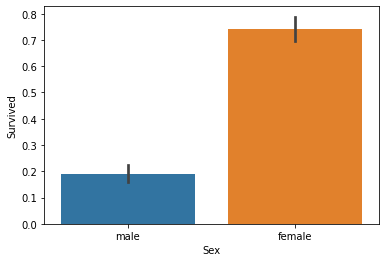

In [41]:
# 성별이 생존에 미치는 영향

sns.barplot(x = df["Sex"], y = df["Survived"])
plt.show()

# 누구나 알고 있듯이 여성이 생존율이 높음

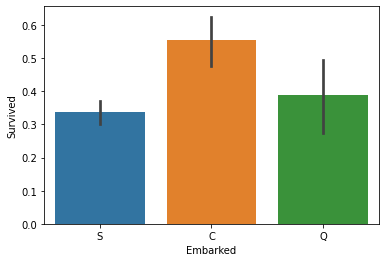

In [42]:
# Embarked 가 생존에 미치는 영향
sns.barplot(x = df["Embarked"], y = df["Survived"])
plt.show()

# C: cherbourg, Q: Queenstown, S: Southampthon 
# 'Southampthon'의 생존율이 다소 낮음.. 
# 다른 변와의 관계확인

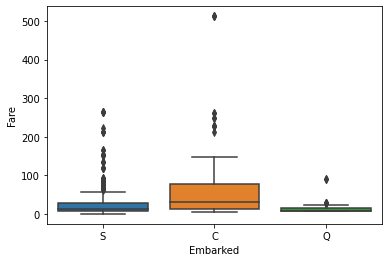

In [43]:

sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

# 이상치를 제거후 다시 확인필요

In [44]:
# fare가 450 초과건 삭제

index = df[df["Fare"] > 450 ].index
df.drop(index, axis = 0, inplace=True)

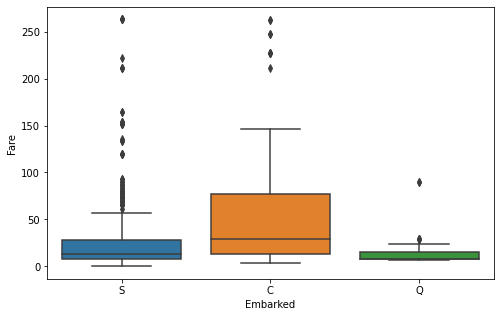

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

# C의 표값이 더 비싸니 생존할 확률이 높음
# 하지만 Q는 S보다 더 싸지만.. Q의 생존율이 더 높았음
# 탑승위치보다도 배치가 더 영향을 미침

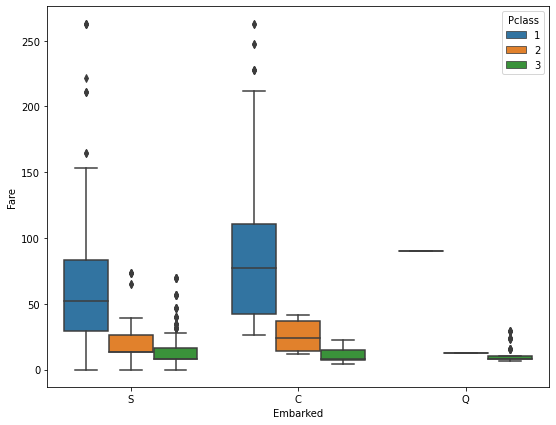

In [46]:

plt.figure(figsize=(9,7))
sns.boxplot(x = df["Embarked"], y = df["Fare"],hue = df["Pclass"])
plt.show()

# Q는 가난한 사람들, C는 주로 부자들이 탐

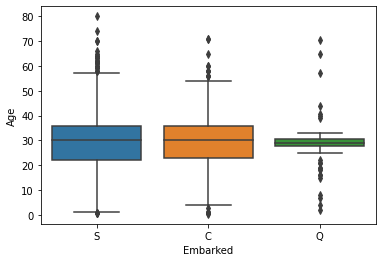

In [47]:
# Embarked의 평균연령확인\

sns.boxplot(y = df["Age"], x = df["Embarked"])
plt.show()

# 거의 유사

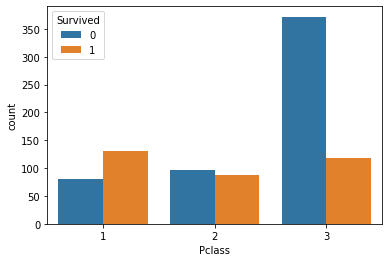

In [48]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])
plt.show()

# 3등급의 사망이 많음

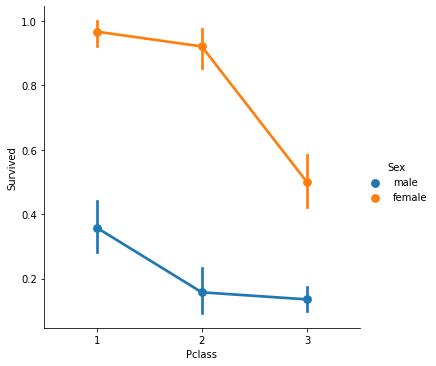

In [49]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

# 1, 2 등급의 여성의 생존율이 엄청 높음

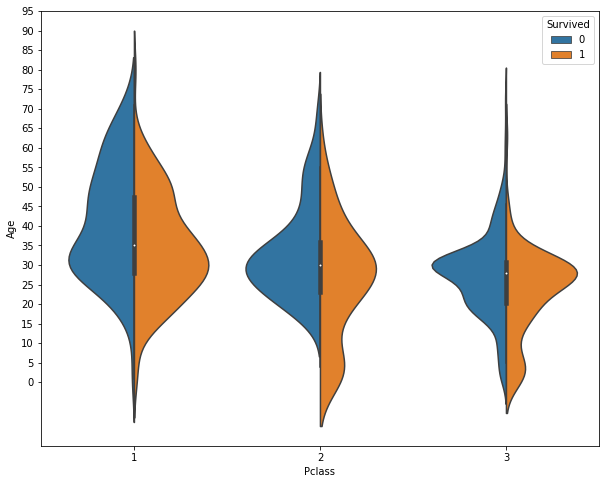

In [50]:
plt.figure(figsize=(10,8))
plt.yticks(range(0,110,5))
sns.violinplot(x = df["Pclass"], y = df["Age"], hue = df["Survived"],split = True)

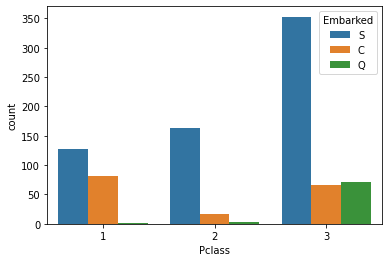

In [51]:
sns.countplot(df["Pclass"], hue = df["Embarked"])

# Q탑승부두는 부다들이 아니다는것을 확인

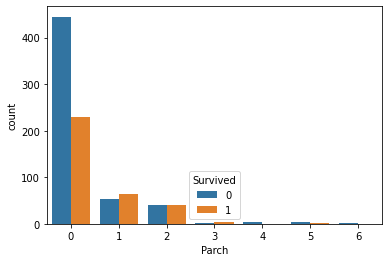

In [52]:
sns.countplot(df["Parch"], hue=df["Survived"])
plt.show()

Text(0, 0.5, 'Chance of survival')

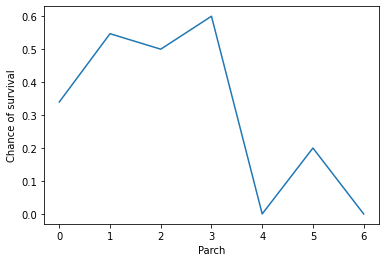

In [53]:
plt.plot(df.groupby("Parch")["Survived"].mean())
plt.xlabel("Parch")
plt.ylabel("Chance of survival")

# parch 4에서 급락하고 5에서 급증후 급락..

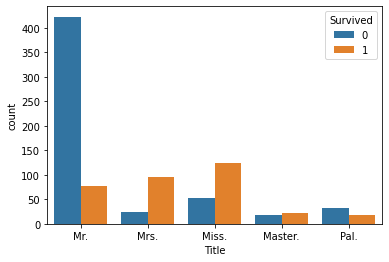

In [54]:
# Title이 생존과이 연관
sns.countplot(df["Title"], hue = df["Survived"])
plt.show()

# Miss, Mrs의 생존이 높음

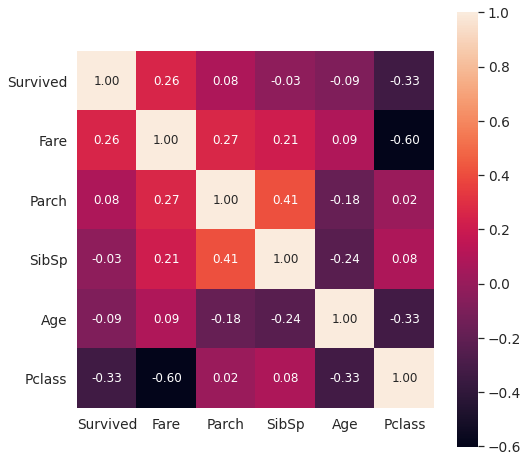

In [55]:
a = df.corr()
plt.figure(figsize=(8,8))
k = 10
cols = a.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [56]:
df["Family"] = df["Parch"] + df["SibSp"] + 1

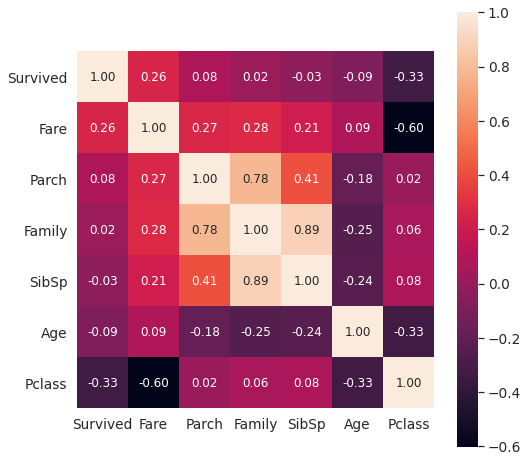

In [57]:
a = df.corr()
plt.figure(figsize=(8,8))
k = 10
cols = a.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

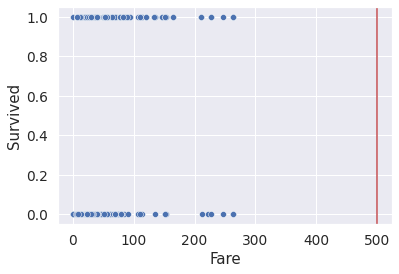

In [58]:
sns.scatterplot(x = df["Fare"], y = df["Survived"])
plt.axvline(500, color = 'r')

In [59]:
index = df[df["Fare"] > 500].index
df.loc[index,:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family


In [60]:
df.drop(index,inplace=True)

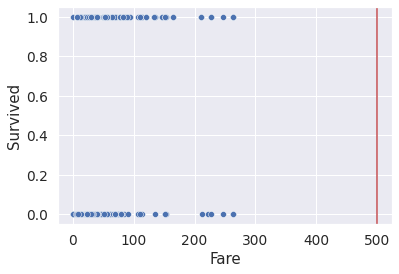

In [61]:
sns.scatterplot(x = df["Fare"], y = df["Survived"])
plt.axvline(500, color = 'r')

# 7. Feature Engineering

In [62]:
# 범주형을 숫자로 변형
def change_sex(sex):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0

In [63]:
df["Sex"] = df.apply(lambda row : change_sex(row["Sex"]),axis = 1)

In [64]:
df["Embarked"].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

In [65]:
def change_em(em):
    if em == "S":
        return 0
    elif em == "C":
        return 1
    elif em == "Q":
        return 2

# S -> 0
# C -> 1
# Q -> 2

In [66]:
df["Embarked"] = df.apply(lambda row : change_em(row["Embarked"]),axis = 1)

In [67]:
# 더미변수를 활용하여 성능향상

emb = df["Embarked"]
sex = df["Sex"]
title = df["Title"]
pcl = df["Pclass"]

In [68]:
s = pd.get_dummies(sex, columns=["Sex"], prefix="Sex_is" )
e = pd.get_dummies(emb, columns=["Embarked"], prefix="Embarked_is" )
t = pd.get_dummies(title, columns=["Title"], prefix="Title_is" )
p = pd.get_dummies(pcl,columns=["Pclass"],prefix="Pclass_is")

In [69]:
main = s.join(e)
main = main.join(t)
main = main.join(p)

In [70]:
df = df.join(main)

In [71]:
df = df.drop(["Embarked","Sex","Pclass","Title"], axis = 1)

In [72]:
df

,Survived,Age,SibSp,Parch,Fare,Family,Sex_is_0,Sex_is_1,Embarked_is_0,Embarked_is_1,Embarked_is_2,Title_is_Master.,Title_is_Miss.,Title_is_Mr.,Title_is_Mrs.,Title_is_Pal.,Pclass_is_1,Pclass_is_2,Pclass_is_3
0,0,22.000000,1,0,7.2500,2,0,1,1,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,2,1,0,0,1,0,0,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,1,1,0,1,0,0,0,1,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,2,1,0,1,0,0,0,0,0,1,0,1,0,0
4,0,35.000000,0,0,8.0500,1,0,1,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,1,0,0,0,0,0,0,1,0,1,0
887,1,19.000000,0,0,30.0000,1,1,0,1,0,0,0,1,0,0,0,1,0,0
888,0,27.915709,1,2,23.4500,4,1,0,1,0,0,0,1,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,1,0,1,0,0,0,1,0,0,1,0,0


In [73]:
X = df.drop("Survived",axis = 1)
y= df["Survived"]

## 8. 데이터분할

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

##9. Scaling the features¶

In [75]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [76]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀수행
# 10. Train the model

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#11. 테스트데이터 예측

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0])

In [80]:
# 12. 모델평가

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [81]:
accuracy_score(y_test, y_pred)

0.8361774744027304

In [82]:
confusion_matrix(y_test, y_pred)

array([[155,  19],
       [ 29,  90]])

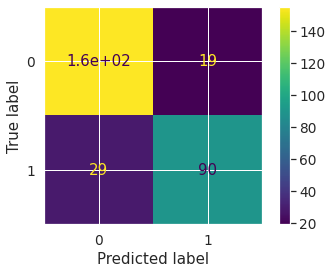

In [83]:
plot_confusion_matrix(model, X_test, y_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       174
           1       0.83      0.76      0.79       119

    accuracy                           0.84       293
   macro avg       0.83      0.82      0.83       293
weighted avg       0.84      0.84      0.83       293

